### Rafly Faldiansyah Putra
### 210411100063
### PPW A

In [53]:
import string
import pandas as pd
import numpy as np

In [68]:
import requests
from bs4 import BeautifulSoup
import csv

# URL dari artikel sepak bola di IDN Times
url = 'https://www.idntimes.com/news/indonesia/irfanfathurohman/polisi-buru-keberadaan-katak-bhizer-diduga-promosi-judi-online'

# Membuat permintaan ke URL
response = requests.get(url)

# Inisialisasi data yang akan disimpan
# Mengambil ulang dan membersihkan data yang diminta
artikel_mees = []

if response.status_code == 200:
    # Parsing halaman web
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Mengambil judul artikel
    title = soup.find('h1').get_text().strip()
    
    # Mengambil tanggal publikasi artikel dan membersihkan spasi berlebih
    date = soup.find('time').get_text().strip()
    
    # Mengambil isi artikel dengan membersihkan konten tambahan
    content = soup.find_all('p')
    article_text = '\n'.join([p.get_text().strip() for p in content if p.get_text().strip()])

    # Simpan data dalam bentuk dictionary yang telah dibersihkan
    artikel_mees.append({
        'Title': title,
        'Date': date,
        'Content': article_text
    })

# Membuat dataframe dari data yang telah dibersihkan
data_mees = pd.DataFrame(artikel_mees)

# Menampilkan dataframe yang bersih
data_mees

,Title,Date,Content
0,"Polisi Buru Keberadaan Katak Bhizer, Diduga Pr...",09 Oct 24 | 20:34,Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...


In [69]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
# Proses case folding
def casefolding(Content):
    if isinstance(Content, list):
        # Jika Content adalah list, terapkan case folding pada setiap elemen
        return [str(item).lower() for item in Content]
    else:
        # Jika Content adalah string, langsung terapkan case folding
        return str(Content).lower()

# Terapkan fungsi casefolding pada kolom 'Content'
data_mees['Content'] = data_mees['Content'].apply(casefolding)

data_mees.head()

,Title,Date,Content
0,"Polisi Buru Keberadaan Katak Bhizer, Diduga Pr...",09 Oct 24 | 20:34,regional\nkategori\nevent\ndownload idn app se...


In [71]:
csv_filename = "artikel_mees_hilgers.csv"
data_mees.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke artikel_mees_hilgers.csv


In [72]:
data_mees = pd.read_csv("artikel_mees_hilgers.csv", sep=',', encoding='latin1')
data_mees.head()

,Title,Date,Content
0,"Polisi Buru Keberadaan Katak Bhizer, Diduga Pr...",09 Oct 24 | 20:34,regional\nkategori\nevent\ndownload idn app se...


In [73]:
def cleansing(Content):
    # Menghapus whitespace di awal dan akhir teks
    Content = Content.strip()
    
    # Menghapus tanda baca dan karakter khusus
    Content = re.sub(f"[{string.punctuation}]", '', Content)
    
    # Menghapus angka
    Content = re.sub(r'\d+', '', Content)
    
    # Menghapus huruf tunggal (opsional, tergantung kebutuhan)
    Content = re.sub(r"\b[a-zA-Z]\b", "", Content)
    
    # Menghapus karakter-karakter non-standar seperti â
    Content = re.sub(r'[^\x00-\x7F]+', '', Content)
    
    # Menghapus spasi ganda
    Content = re.sub(r'\s+', ' ', Content)
    
    return Content

# Terapkan fungsi cleansing pada kolom 'Content'
data_mees['Content'] = data_mees['Content'].apply(cleansing)

# Menampilkan 5 baris pertama
data_mees.head(5)

,Title,Date,Content
0,"Polisi Buru Keberadaan Katak Bhizer, Diduga Pr...",09 Oct 24 | 20:34,regional kategori event download idn app sekar...


In [74]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rafly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd  # Ensure you import pandas for DataFrame usage

# Download required resources
nltk.download('punkt')
nltk.download('punkt_tab')

# Assume article_text is defined; replace with your actual text
# article_text = "Your article text goes here."

# Ekstraksi kalimat dari konten artikel
sentences = sent_tokenize(article_text)

# Tokenisasi tiap kalimat menjadi term
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]

# Membuat objek yang menyimpan hasil term dari setiap kalimat
extracted_terms = [{'Sentence': sentence, 'Terms': terms} for sentence, terms in zip(sentences, terms_per_sentence)]

# Menampilkan hasilnya sebagai dataframe
df_terms = pd.DataFrame(extracted_terms)

# Menampilkan dataframe
print(df_terms)


                                             Sentence  \
0   Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...   
1   Jakarta, IDN Times - Polda Metro Jaya menerima...   
2   Kabid Humas Polda Metro Jaya, Kombes Pol Ade A...   
3   “Berdasarkan pengaduan masyarkat bahwa Katak B...   
4   Baca Juga: Judi Online SLOT8278 Dikendalikan W...   
5   Setelah itu, polisi mendapatkan informasi bahw...   
6   “Setelah dilakukan pendalaman, penyelidik mend...   
7   Baca Juga: Bareskrim Ungkap Kasus Judi Online ...   
8   Terkait penyelidikan ini, polisi pun menggande...   
9   “Saat ini chanel YouTube katak Bhizer sudah di...   
10  Baca Juga: Kolom Komentar YouTube KPU Jakarta ...   
11  Polisi saat ini sedang memburu keberadaan Kata...   
12  “Apabila itu termonitor, terinformasi, ada pen...   
13  Baca Juga: Polisi Selidiki Kasus Penipuan Wedd...   

                                                Terms  
0   [Regional, Kategori, Event, DOWNLOAD, IDN, APP...  
1   [Jakarta, ,, IDN, Times, -, 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rafly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rafly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [76]:
csv_filename = "artikel_mees_hilgers_ekstract_term.csv"
df_terms.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke artikel_mees_hilgers_ekstract_term.csv


In [77]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

# Assuming we have the article_text
sentences = sent_tokenize(article_text)
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]
extracted_terms = [{'Sentence': sentence, 'Terms': terms} for sentence, terms in zip(sentences, terms_per_sentence)]
df_terms = pd.DataFrame(extracted_terms)

# Menggabungkan terms menjadi string untuk setiap kalimat
df_terms['Terms_String'] = df_terms['Terms'].apply(' '.join)

# Membuat TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_terms['Terms_String'])

# Mendapatkan nama-nama feature (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk nilai TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menambahkan kolom Sentence
tfidf_df['Sentence'] = df_terms['Sentence']

# Melelehkan (melting) DataFrame untuk format yang lebih mudah dibaca
melted_tfidf = tfidf_df.melt(id_vars=['Sentence'], var_name='Term', value_name='TF-IDF')

# Menghapus baris dengan nilai TF-IDF 0
melted_tfidf = melted_tfidf[melted_tfidf['TF-IDF'] != 0]

# Mengurutkan berdasarkan nilai TF-IDF tertinggi
melted_tfidf = melted_tfidf.sort_values('TF-IDF', ascending=False)

# Menampilkan hasil
print(melted_tfidf)

                                               Sentence          Term  \
795   Polisi saat ini sedang memburu keberadaan Kata...    keberadaan   
1005  Polisi saat ini sedang memburu keberadaan Kata...       memburu   
1632  Terkait penyelidikan ini, polisi pun menggande...       terkait   
1338  Terkait penyelidikan ini, polisi pun menggande...           pun   
1254  Terkait penyelidikan ini, polisi pun menggande...  penyelidikan   
...                                                 ...           ...   
320   “Apabila itu termonitor, terinformasi, ada pen...            di   
228   Baca Juga: Judi Online SLOT8278 Dikendalikan W...        bhizer   
746   Baca Juga: Judi Online SLOT8278 Dikendalikan W...         katak   
749   Baca Juga: Bareskrim Ungkap Kasus Judi Online ...         katak   
231   Baca Juga: Bareskrim Ungkap Kasus Judi Online ...        bhizer   

        TF-IDF  
795   0.471598  
1005  0.471598  
1632  0.440646  
1338  0.440646  
1254  0.440646  
...        ...  
320 

In [79]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Assuming we have the melted_tfidf DataFrame from the previous code
# If not, uncomment and run the previous code to get melted_tfidf

# Step 1: Pivot the melted DataFrame back to wide format
tfidf_wide = melted_tfidf.pivot(index='Sentence', columns='Term', values='TF-IDF').fillna(0)

# Step 2: Calculate cosine similarity between sentences
num_sentences = len(tfidf_wide)
adjacency_matrix = np.zeros((num_sentences, num_sentences))

for i in range(num_sentences):
    for j in range(i, num_sentences):  # We only need to calculate upper triangle
        if i == j:
            adjacency_matrix[i][j] = 1.0  # Sentence is fully similar to itself
        else:
            similarity = 1 - cosine(tfidf_wide.iloc[i], tfidf_wide.iloc[j])
            adjacency_matrix[i][j] = similarity
            adjacency_matrix[j][i] = similarity  # Matrix is symmetric

# Create a DataFrame for better visualization
adjacency_df = pd.DataFrame(adjacency_matrix, 
                            index=tfidf_wide.index, 
                            columns=tfidf_wide.index)

# Display the adjacency matrix
print("Adjacency Matrix:")
print(adjacency_df)

# Optional: You can set a threshold to consider only strong connections
threshold = 0.5
adjacency_df_thresholded = adjacency_df.where(adjacency_df > threshold, 0)

print("\nAdjacency Matrix (with threshold):")
print(adjacency_df_thresholded)

# Optional: Save to CSV
adjacency_df.to_csv('adjacency_matrix.csv')
adjacency_df_thresholded.to_csv('adjacency_matrix_thresholded.csv')

Adjacency Matrix:
Sentence                                            Baca Juga: Bareskrim Ungkap Kasus Judi Online SLOT8278, Sita Uang Rp6 Miliar\nDalam mempromosikan judi online ini, Katak Bhizer diduga melakukannya dengan siaran langsung.  \
Sentence                                                                                                                                                                                                                          
Baca Juga: Bareskrim Ungkap Kasus Judi Online S...                                           1.000000                                                                                                                             
Baca Juga: Judi Online SLOT8278 Dikendalikan WN...                                           0.282416                                                                                                                             
Baca Juga: Kolom Komentar YouTube KPU Jakarta D...                        

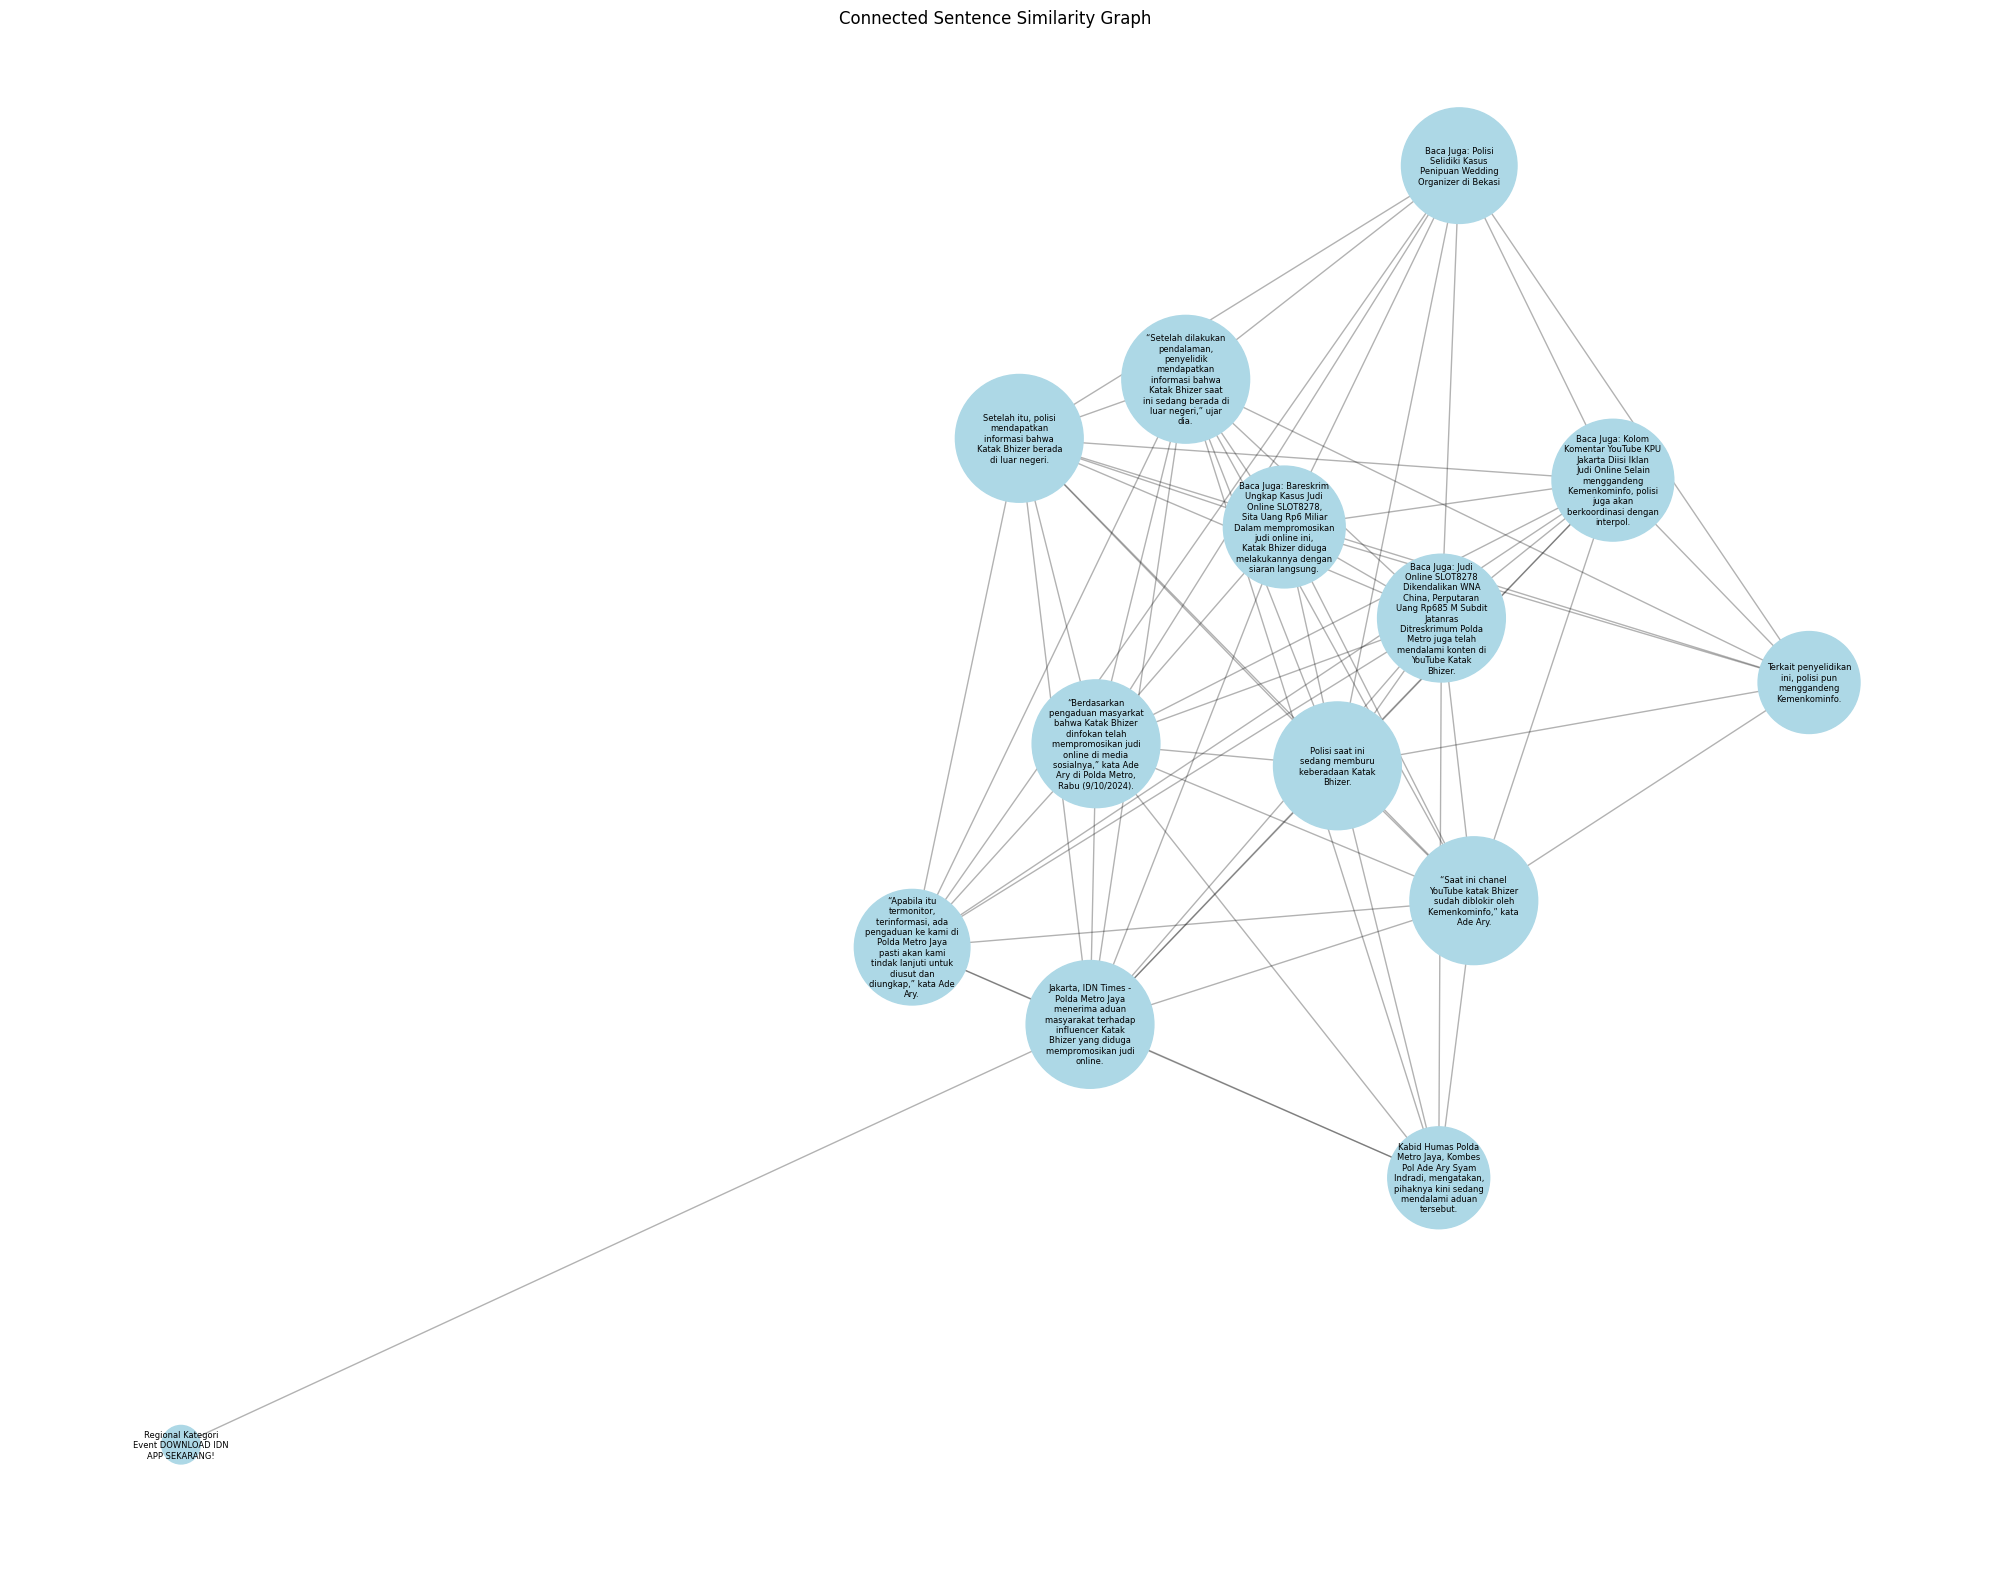

Number of nodes: 14
Number of edges: 65
Is the graph connected? True

Centrality Measures:
                                             Sentence  Degree Centrality  \
1   Baca Juga: Judi Online SLOT8278 Dikendalikan W...           0.846154   
4   Jakarta, IDN Times - Polda Metro Jaya menerima...           0.846154   
6   Polisi saat ini sedang memburu keberadaan Kata...           0.846154   
8   Setelah itu, polisi mendapatkan informasi bahw...           0.846154   
11  “Berdasarkan pengaduan masyarkat bahwa Katak B...           0.846154   
12  “Saat ini chanel YouTube katak Bhizer sudah di...           0.846154   
13  “Setelah dilakukan pendalaman, penyelidik mend...           0.846154   
0   Baca Juga: Bareskrim Ungkap Kasus Judi Online ...           0.769231   
2   Baca Juga: Kolom Komentar YouTube KPU Jakarta ...           0.769231   
3   Baca Juga: Polisi Selidiki Kasus Penipuan Wedd...           0.692308   
10  “Apabila itu termonitor, terinformasi, ada pen...           0.692308 

In [80]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import textwrap

# Assuming we have the tfidf_wide DataFrame and original sentences from previous steps
# If not, you need to run the TF-IDF calculation code first

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_wide)

# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(cosine_sim, index=tfidf_wide.index, columns=tfidf_wide.index)

# Create a graph from the similarity matrix
G = nx.from_pandas_adjacency(similarity_df)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Function to get the largest connected component
def get_largest_component(G):
    return max(nx.connected_components(G), key=len)

# Ensure the graph is connected
while not nx.is_connected(G):
    largest_component = get_largest_component(G)
    isolated_nodes = set(G.nodes()) - set(largest_component)
    if not isolated_nodes:
        break
    for node in isolated_nodes:
        similarities = [(other_node, similarity_df.loc[node, other_node]) 
                        for other_node in largest_component]
        most_similar_node = max(similarities, key=lambda x: x[1])[0]
        G.add_edge(node, most_similar_node)

# Function to wrap text
def wrap_text(text, width=20):
    return '\n'.join(textwrap.wrap(text, width=width))

# Prepare labels (wrapped sentences)
labels = {node: wrap_text(node) for node in G.nodes()}

# Now let's visualize the graph
plt.figure(figsize=(20, 16))  # Increased figure size
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Calculate node sizes based on degree centrality
degree_centrality = nx.degree_centrality(G)
node_sizes = [v * 10000 for v in degree_centrality.values()]  # Increased node sizes

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Add labels
nx.draw_networkx_labels(G, pos, labels, font_size=6)  # Reduced font size

plt.title("Connected Sentence Similarity Graph")
plt.axis('off')
plt.tight_layout()

# Save the graph as an image
plt.savefig('connected_sentence_similarity_graph.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print some information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph connected? {nx.is_connected(G)}")

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create a DataFrame with centrality measures
centrality_data = []
for node in G.nodes():
    centrality_data.append({
        'Sentence': node,
        'Degree Centrality': degree_centrality[node],
        'Closeness Centrality': closeness_centrality[node],
        'Betweenness Centrality': betweenness_centrality[node]
    })

centrality_df = pd.DataFrame(centrality_data)

# Sort by Degree Centrality
centrality_df = centrality_df.sort_values('Degree Centrality', ascending=False)

print("\nCentrality Measures:")
print(centrality_df)

# Save centrality measures to CSV
centrality_df.to_csv('centrality_measures_with_sentences.csv', index=False)

# Optionally, print the top 5 sentences by each centrality measure
print("\nTop 5 sentences by Degree Centrality:")
print(centrality_df.nlargest(5, 'Degree Centrality')[['Sentence', 'Degree Centrality']])

print("\nTop 5 sentences by Closeness Centrality:")
print(centrality_df.nlargest(5, 'Closeness Centrality')[['Sentence', 'Closeness Centrality']])

print("\nTop 5 sentences by Betweenness Centrality:")
print(centrality_df.nlargest(5, 'Betweenness Centrality')[['Sentence', 'Betweenness Centrality']])